In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data = data[(data.Datetime >= '2019-10-01') & (data.Datetime < '2020-12-08')].reset_index(drop=True)
data.head()
import copy

In [3]:
df = copy.deepcopy(data)
df = pd.concat([df, pd.get_dummies(df.confinement, prefix="confinement")], axis=1)
drop = ['confinement', 'Datetime', 'etat_barre_ce', 'etat_barre_lc', 'etat_barre_pv', 'Année', 'Mois', 'Jour', 'Heure', 'Jour semaine']
target_ce = ['q_ce', 'k_ce']
target_lc = ['q_lc', 'k_lc']
target_pv = ['q_pv', 'k_pv']
all_ = drop + target_ce + target_lc + target_pv
features = [x for x in df.columns.tolist() if x not in all_]
df = df.drop(drop, axis=1)
df_ce = copy.deepcopy(df[features + target_ce])
df_lc = copy.deepcopy(df[features + target_lc])
df_pv = copy.deepcopy(df[features + target_pv])

In [4]:
x_ce, y_qce, y_kce = df_ce.drop(['q_ce', 'k_ce'], axis=1), df_ce['q_ce'], df_ce['k_ce']
x_lc, y_qlc, y_klc = df_lc.drop(['q_lc', 'k_lc'], axis=1), df_lc['q_lc'], df_lc['k_lc']
x_pv, y_qpv, y_kpv = df_pv.drop(['q_pv', 'k_pv'], axis=1), df_pv['q_pv'], df_pv['k_pv']

# Scale

In [25]:
x_ce_mean, x_ce_std = x_ce.mean(), x_ce.std()
x_ce = (x_ce - x_ce_mean)/x_ce_std
x_lc_mean, x_lc_std = x_lc.mean(), x_lc.std()
x_lc = (x_lc - x_lc_mean)/x_lc_std
x_pv_mean, x_pv_std = x_pv.mean(), x_pv.std()
x_pv = (x_pv - x_pv_mean)/x_pv_std

In [5]:
x_ce_mean, x_ce_std = x_ce.max(), x_ce.min()
x_ce = (x_ce - x_ce_std)/(x_ce_mean - x_ce_std)
x_lc_mean, x_lc_std = x_lc.max(), x_lc.min()
x_lc = (x_lc - x_lc_std)/(x_lc_mean - x_lc_std)
x_pv_mean, x_pv_std = x_pv.max(), x_pv.min()
x_pv = (x_pv - x_pv_std)/(x_pv_mean - x_pv_std)

In [6]:
x_ce.describe()

,temp,templow,icon,baro,hum,rain,fog,thunder,snow,Férié,...,desc_Partly sunny.,desc_Passing clouds.,desc_Rain. Fog.,desc_Scattered clouds.,desc_Sunny.,desc_Thunderstorms. Fog.,confinement_-3.0,confinement_-2.0,confinement_-1.0,confinement_0.0
count,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,...,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000,10416.000000
mean,0.379177,0.368055,0.269742,0.559980,0.666677,0.052995,0.050691,0.001152,0.000576,0.029954,...,0.083525,0.242512,0.000576,0.007488,0.072581,0.000576,0.126728,0.066820,0.023041,0.783410
std,0.169822,0.168571,0.212821,0.142075,0.236990,0.224035,0.219377,0.033924,0.023995,0.170468,...,0.276688,0.428623,0.023995,0.086216,0.259459,0.023995,0.332684,0.249722,0.150042,0.411941
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.259740,0.257143,0.151515,0.485294,0.506494,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.363636,0.342857,0.242424,0.573529,0.727273,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.493506,0.485714,0.393939,0.647059,0.857143,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
exog_array = np.array([x_ce.values, x_ce.values, x_lc.values, x_lc.values, x_pv.values, x_pv.values])

# Train and Validation Series Partioning

In [8]:
from datetime import timedelta
pred_steps = 144
pred_length = timedelta(hours=pred_steps)
first_day = pd.to_datetime(data.Datetime.min())
last_day = pd.to_datetime(data.Datetime.max())
val_pred_start = last_day - pred_length + timedelta(hours=1)
val_pred_end = last_day
train_pred_start = val_pred_start - pred_length
train_pred_end = val_pred_start - timedelta(hours=1)

In [9]:
enc_length = train_pred_start - first_day

train_enc_start = first_day
train_enc_end = train_enc_start + enc_length - timedelta(hours=1)

val_enc_start = train_enc_start + pred_length
val_enc_end = val_enc_start + enc_length - timedelta(hours=1)
print('Train encoding:', train_enc_start, '-', train_enc_end)
print('Train prediction:', train_pred_start, '-', train_pred_end, '\n')
print('Val encoding:', val_enc_start, '-', val_enc_end)
print('Val prediction:', val_pred_start, '-', val_pred_end)

print('\nEncoding interval:', enc_length.total_seconds()/3600)
print('Prediction interval:', pred_length.total_seconds()/3600)

Train encoding: 2019-10-01 00:00:00 - 2020-11-25 23:00:00
Train prediction: 2020-11-26 00:00:00 - 2020-12-01 23:00:00 

Val encoding: 2019-10-07 00:00:00 - 2020-12-01 23:00:00
Val prediction: 2020-12-02 00:00:00 - 2020-12-07 23:00:00

Encoding interval: 10128.0
Prediction interval: 144.0


# Keras Data Formatting

In [10]:
date_to_index = pd.Series(index=pd.to_datetime(data.Datetime), data=[i for i in range(len(data))])
series_array = np.array([y_qce.values, y_kce.values, y_qlc.values, y_klc.values, y_qpv.values, y_kpv.values])

In [11]:
def get_time_block_series(series_array, date_to_index, start_date, end_date):
    
    inds = date_to_index[start_date:end_date]
    return series_array[:,inds]

def transform_series_encode(series_array):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_mean = series_array.mean(axis=1).reshape(-1,1) 
    series_array = series_array - series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array, series_mean

def transform_series_decode(series_array, encode_series_mean):
    
    series_array = np.log1p(np.nan_to_num(series_array)) # filling NaN with 0
    series_array = series_array - encode_series_mean
    series_array = series_array.reshape((series_array.shape[0],series_array.shape[1], 1))
    
    return series_array

In [12]:
def get_data_encode_decode(series_array, exog_array, first_n_samples,
                           date_to_index, enc_start, enc_end, pred_start, pred_end):

    exog_inds = date_to_index[enc_start:pred_end]
    
    # sample of series from enc_start to enc_end  
    encoder_input_data = get_time_block_series(series_array, date_to_index, 
                                               enc_start, enc_end)[:first_n_samples]
    encoder_input_data, encode_series_mean = transform_series_encode(encoder_input_data)
    
    # sample of series from pred_start to pred_end 
    decoder_target_data = get_time_block_series(series_array, date_to_index, 
                                                pred_start, pred_end)[:first_n_samples]
    decoder_target_data = transform_series_decode(decoder_target_data, encode_series_mean)
    
    # we append a lagged history of the target series to the input data, 
    # so that we can train with teacher forcing
    lagged_target_history = decoder_target_data[:,:-1,:1]
    encoder_input_data = np.concatenate([encoder_input_data, lagged_target_history], axis=1)
    # we add the exogenous features corresponding to day after input series
    # values to the input data (exog should match day we are predicting)
    exog_input_data = exog_array[:first_n_samples,exog_inds,:][:,1:,:]
    encoder_input_data = np.concatenate([encoder_input_data, exog_input_data], axis=-1)
    
    return encoder_input_data, decoder_target_data

# Models

In [13]:
import tensorflow as tf
import logging
#logger = tf.get_logger()
#logger.setLevel(logging.ERROR)

from keras.models import Model
from keras.layers import Input, Conv1D, Dense, Activation, Dropout, Lambda, Multiply, Add, Concatenate
from keras.optimizers import Adam

# convolutional operation parameters
n_filters = 64 # 32 
filter_width = 2
dilation_rates = [2**i for i in range(8)] * 2 

# define an input history series and pass it through a stack of dilated causal convolution blocks. 
# Note the feature input dimension corresponds to the raw series and all exogenous features  
history_seq = Input(shape=(None, 1 + exog_array.shape[-1]))
x = history_seq

skips = []
for dilation_rate in dilation_rates:
    
    # preprocessing - equivalent to time-distributed dense
    x = Conv1D(32, 1, padding='same', activation='relu')(x) 
    
    # filter convolution
    x_f = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # gating convolution
    x_g = Conv1D(filters=n_filters,
                 kernel_size=filter_width, 
                 padding='causal',
                 dilation_rate=dilation_rate)(x)
    
    # multiply filter and gating branches
    z = Multiply()([Activation('tanh')(x_f),
                    Activation('sigmoid')(x_g)])
    
    # postprocessing - equivalent to time-distributed dense
    z = Conv1D(32, 1, padding='same', activation='relu')(z)
    
    # residual connection
    x = Add()([x, z])    
    
    # collect skip connections
    skips.append(z)

# add all skip connection outputs 
out = Activation('relu')(Add()(skips))

# final time-distributed dense layers 
out = Conv1D(128, 1, padding='same')(out)
out = Activation('relu')(out)
out = Dropout(.2)(out)
out = Conv1D(1, 1, padding='same')(out)

# extract the last 60 time steps as the training target
def slice(x, seq_length):
    return x[:,-seq_length:,:]

pred_seq_train = Lambda(slice, arguments={'seq_length':144})(out)

model = Model(history_seq, pred_seq_train)
#model.compile(Adam(lr=0.0001), loss='mean_absolute_error')

In [14]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 120)]  0                                            
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, None, 32)     3872        input_1[0][0]                    
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, None, 64)     4160        conv1d[0][0]                     
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, None, 64)     4160        conv1d[0][0]                     
_______________________________________________________________________________________

In [15]:
first_n_samples = 1
batch_size = 2**10 
epochs = 50

encoder_input_data, decoder_target_data = \
    get_data_encode_decode(series_array, exog_array, first_n_samples, date_to_index, 
                           train_enc_start, train_enc_end, train_pred_start, train_pred_end)

model.compile(Adam(lr=0.000001), loss='mean_absolute_error')
history = model.fit(encoder_input_data, decoder_target_data,
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/50
1/1 [==============================] - 0s 935us/step - loss: nan
Epoch 2/50
1/1 [==============================] - 0s 828us/step - loss: nan
Epoch 3/50
1/1 [==============================] - 0s 839us/step - loss: nan
Epoch 4/50
1/1 [==============================] - 0s 855us/step - loss: nan
Epoch 5/50
1/1 [==============================] - 0s 1ms/step - loss: nan
Epoch 6/50
1/1 [==============================] - 0s 862us/step - loss: nan
Epoch 7/50
1/1 [==============================] - 0s 847us/step - loss: nan
Epoch 8/50
1/1 [==============================] - 0s 1ms/step - loss: nan


KeyboardInterrupt: 

In [26]:
encoder_input_data, decoder_target_data = \
    get_data_encode_decode(series_array, exog_array, 1, date_to_index, 
                           val_enc_start, val_enc_end, val_pred_start, val_pred_end)

In [27]:
def predict_sequence(input_tensor):

    history_tensor = input_tensor[:,:(-pred_steps+1),:]
    pred_sequence = np.zeros((1,pred_steps,1)) # initialize output (pred_steps time steps)  
    
    for i in range(pred_steps):
        
        # record next time step prediction (last time step of model output) 
        last_step_pred = model.predict(history_tensor)[0,-1,0]
        pred_sequence[0,i,0] = last_step_pred
        
        # add the next time step prediction along with corresponding exogenous features
        # to the history tensor
        last_step_exog = input_tensor[:,[(-pred_steps+1)+i],1:]
        last_step_tensor = np.concatenate([last_step_pred.reshape((1,1,1)), 
                                           last_step_exog], axis=-1)
        history_tensor = np.concatenate([history_tensor, last_step_tensor], axis=1)

    return pred_sequence

In [28]:
def predict_and_plot(encoder_input_data, decoder_target_data, sample_ind, enc_tail_len=50):

    encode_tensor = encoder_input_data[[sample_ind],:,:] 
    pred_series = predict_sequence(encode_tensor)
    
    encode_series = encode_tensor[:,:(-pred_steps+1),0].reshape(-1,1)
    pred_series = pred_series.reshape(-1,1)
    target_series = decoder_target_data[sample_ind,:,:1].reshape(-1,1) 
    
    encode_series_tail = np.concatenate([encode_series[-enc_tail_len:],target_series[:1]])
    x_encode = encode_series_tail.shape[0]
    plt.figure(figsize=(10,6))   
    plt.plot(range(1,x_encode+1),np.expm1(encode_series_tail))
    plt.plot(range(x_encode,x_encode+pred_steps),np.expm1(target_series),color='orange')
    plt.plot(range(x_encode,x_encode+pred_steps),np.expm1(pred_series),color='teal',linestyle='--')
    
    plt.title('Encoder Series Tail of Length %d, Target Series, and Predictions' % enc_tail_len)
    plt.legend(['Encoding Series','Target Series','Predictions'])

[[nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]
 [nan]

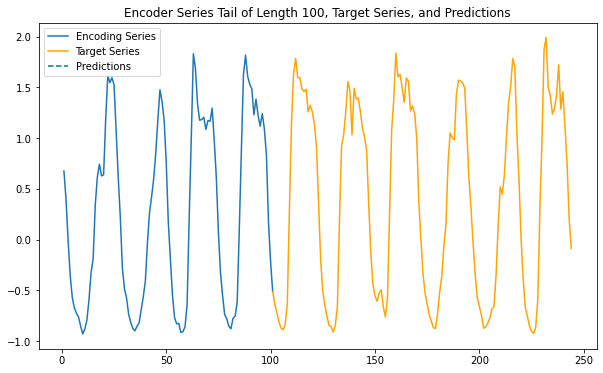

In [29]:
predict_and_plot(encoder_input_data, decoder_target_data, 
                 sample_ind=0, enc_tail_len=100)

In [ ]:
np.expm1()